# 机器学习之逻辑回归

#### 【简介】

**逻辑回归**是属于机器学习里面的**监督学习**，它是以**回归的思想**来解决分类问题的一种非常经典的二分类分类器。由于其训练后的参数有较强的可解释性，在诸多领域中，逻辑回归通常用作 **baseline** 模型，以方便后期更好的挖掘业务相关信息或提升模型性能。

#### 【目录】

1. [逻辑回归的核心思想](#1.-逻辑回归的核心思想)
2. [逻辑回归的损失函数](#2.-逻辑回归的损失函数)
3. [梯度下降](#3.-梯度下降)
4. [动手实训逻辑回归-癌细胞精准识别](#4.-动手实现逻辑回归-癌细胞精准识别)
5. [手写数字识别](#5.-手写数字识别)

## 1. 逻辑回归的核心思想

### 任务描述

根据本节课所学知识完成所设置的编程实操练习。

### 相关知识

为了完成本任务，需要掌握：

- 什么是逻辑回归
- sigmoid函数

#### 什么是逻辑回归

当一看到“回归”这两个字，可能会认为逻辑回归是一种解决回归问题的算法，然而逻辑回归是通过回归的思想来解决二分类问题的算法。

那么问题来了，回归的算法怎样解决分类问题呢？其实很简单，逻辑回归是将样本特征和样本所属类别的概率联系在一起，假设现在已经训练好了一个逻辑回归的模型为$f(x)$ ，模型的输出是**样本$x$的标签是1的概率**，则该模型可以表示为$\hat p = f(x)$ 。若得到了样本$x$属于标签1的概率后，很自然的就能想到当$\hat p > 0.5 $时$x$属于标签1，否则属于标签0。因此就有：

$$
\hat y = \begin{cases}
0 \space \hat p < 0.5\\
1 \space \hat p > 0.5\\
\end{cases}
$$

其中，$\hat y$为样本$x$根据模型预测出的标签结果，标签$0$和标签$1$所代表的含义是根据业务决定的，比如在癌细胞识别中可以使$0$代表良性肿瘤， $1$代表恶性肿瘤。

由于概率是$0$到$1$的实数，所以逻辑回归若只需要计算出样本所属标签的概率就是一种回归算法，若需要计算出样本所属标签，则就是一种二分类算法。

那么逻辑回归中**样本所属标签的概率**怎样计算呢？其实和线性回归有关系，线性回归无非就是训练出一组参数$W^T$和$b$来拟合样本数据，线性回归的输出为$\hat y = W^Tx + b$ 。不过$\hat y$的值域是$(−\infty,+\infty)$，如果能够将值域为$(−\infty,+\infty)$的实数转换成$(0,1)$的概率值的话问题就解决了。要解决这个问题很自然地就能想到将线性回归的输出作为输入，输入到另一个函数中，这个函数能够进行转换工作。假设函数为$\sigma$ ，转换后的概率为$\hat p$，则逻辑回归在预测时可以看成$\hat p = \sigma(W^Tx+b)$。$\sigma$ 就是接下来要介绍的sigmoid函数。

#### sigmoid 函数

sigmoid函数的公式为：

$$
\sigma(t) = \frac{1}{1 + e^{-t}} 
$$

函数图像如下图所示：

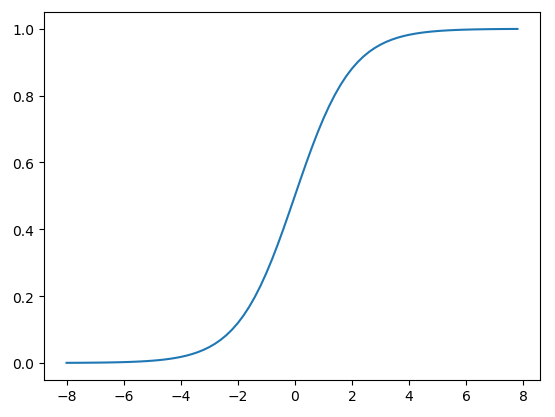

从sigmoid函数的图像可以看出当$t$趋近于$-\infty$时函数值趋近于$0$，当$t$趋近于$+\infty$时函数值趋近于$1$。可见sigmoid函数的值域是$(0,1)$，满足我们要将$(−\infty,+\infty)$的实数转换成 $(0,1)$的概率值的需求。因此逻辑回归在预测时可以看成：

$$
\hat p = 1 / (1 + e^{-W^Tx+b}\space)
$$

### 实操练习

#### 编程要求

根据提示，补充下列 Python 代码，实现sigmoid函数。(提示: numpy.exp()函数可以实现e的幂运算)

#### 测试说明

测试用例：

- 输入：` 1`，预期输出：`0.7310585786300049`
- 输入：`-2`，预期输出：`0.1192029220221176`

In [1]:
import numpy as np

def sigmoid(t):
    '''
    完成sigmoid函数计算
    :param t: 负无穷到正无穷的实数
    :return: 转换后的概率值
    :可以考虑使用np.exp()函数
    '''
    #********** Begin **********#
    return 1/(1 + np.exp(-t))
    #********** End **********#

In [2]:
sigmoid(1)

0.7310585786300049

In [3]:
sigmoid(-2)

0.11920292202211755

## 2. 逻辑回归的损失函数

### 相关知识

#### 为什么需要损失函数

训练逻辑回归模型的过程其实与之前学习的线性回归一样，就是去寻找合适的$W^T$和$b$使得模型的预测结果与真实结果尽可能一致。因此就需要一个函数能够**衡量模型拟合程度**的好坏，也就是说当模型拟合误差越大的时候，函数值应该比较大，反之应该比较小，这就是**损失函数**。

#### 逻辑回归的损失函数

根据上一节所学习到的知识，我们已经知道了逻辑回归计算出的样本所属类别的概率$\hat p = \sigma(W^Tx+b)$，样本所属列表的判定条件为：

$$
\hat y = \begin{cases}
0 \space \hat p < 0.5\\
1 \space \hat p > 0.5\\
\end{cases}
$$

很明显，在预测样本属于哪个类别时取决于算出来的$\hat p$。从另外一个角度来说，假设现在有一个样本的真实类别为$1$，模型预测样本为类别$1$的概率为$0.9$的话，就意味着这个模型认为当前样本的类别有 90%的可能性为$1$，有10%的可能性为$0$。所以从这个角度来看，逻辑回归的损失函数与$\hat p$有关。

当然逻辑回归的损失函数不仅仅与$\hat p$有关，它还与真实类别有关。假设现在有两种情况:

- **情况A**：现在有个样本的真实类别是0，但是模型预测出来该样本是类别1的概率是0.7（也就是说类别 0的概率为0.3）
- **情况B**：现在有个样本的真实类别是0，但是模型预测出来该样本是类别1的概率是0.6（也就是说类别 0的概率为0.4）

那么，AB两种情况哪种情况的误差更大？很显然，情况A的误差更大！因为情况A中模型认为样本是类别0的可能性只有30%，而B有40%。

假设现在又有两种情况：

- **情况A**：现在有个样本的真实类别是0，但是模型预测出来该样本是类别1的概率是0.7（也就是说类别 0的概率为0.3
- **情况B**：现在有个样本的真实类别是1，但是模型预测出来该样本是类别1的概率是0.3（也就是说类别 0的概率为0.7）

那么，AB两种情况哪种情况的误差更大？很显然，**一样大**！

因此**逻辑回归的损失函数**如下，其中cost表示损失函数的值，y表示样本的真实类别：

$$
cost = -y\log(\hat p) - (1 - y)\log(1 - \hat p)
$$

这个式子其实很好理解，当样本的真实类别为1时，式子就变成了$cost = −\log(\hat p)$。此时函数图像如下：

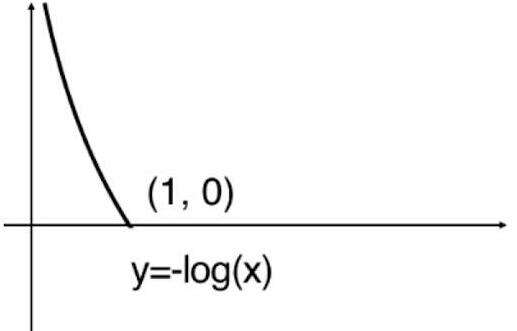

从图像能看出当样本的真实类别为1的前提下，$\hat p$越大，损失函数值就越小。因为$\hat p$越大就越说明模型越认为该样本的类别为1。

当样本的真实类别为0时，式子就变成了$cost = −\log(1 − \hat p)$。此时函数图像如下：

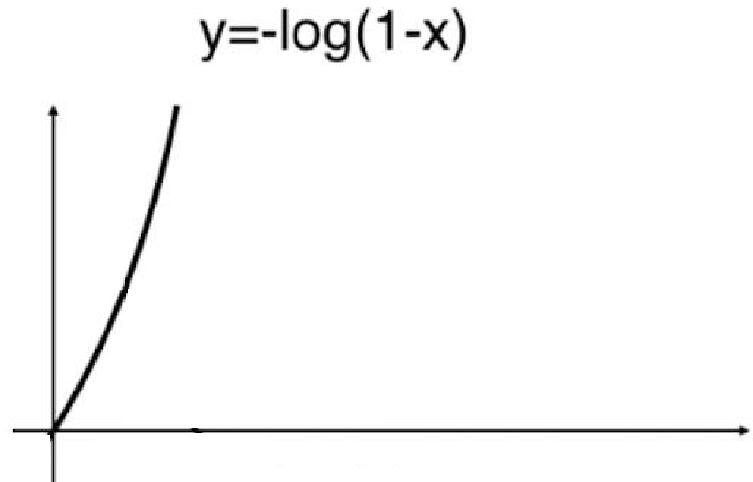

从图像能看出当样本的真实类别为0的前提下，$\hat p$越大，损失函数值就越大。因为$\hat p$越大就越说明模型越认为该样本的类别为1。

$cost = -y\log(\hat p) - (1 - y)\log(1 - \hat p)$是一个样本的损失计算公式，但是在一般情况下需要计算的是$m$条样本数据的平均损失值，所以损失函数的最终形态如下，其中$m$表示数据集中样本的数量，$i$表示数据集中第$i$个样本：

$$
cost = - \frac{1}{m}\sum_{i=0}^m{y^{(i)}\log(\hat p^{(i)}) - (1 - y^{(i)})log(1 - \hat p^{(i)})}
$$

知道了逻辑回归的损失函数之后，逻辑回归的训练流程就很明显了，就是寻找一组合适的$W^T$和$b$，使得损失值最小。找到这组参数后模型就确定下来了。

## 3. 梯度下降

### 任务描述

用 Python 构建梯度下降算法，并求取目标函数最小值。

### 相关知识

为了完成本任务，需要掌握：梯度下降算法。

#### 什么是梯度

梯度：梯度的本意是一个向量，由函数对每个参数的偏导组成，表示某一函数在该点处的方向导数沿着该方向取得最大值，即函数在该点处沿着该方向变化最快，变化率最大。

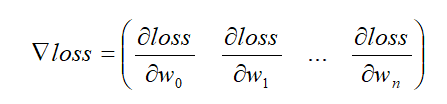

#### 梯度下降算法原理

**算法思想**：梯度下降是一种非常通用的优化算法，能够为大范围的问题找到最优解。梯度下降的中心思想就是迭代地调整参数从而使损失函数最小化。假设你迷失在山上的迷雾中，你能感觉到的只有你脚下路面的坡度。快速到达山脚的一个策略就是沿着最陡的方向下坡。这就是梯度下降的做法：通过测量参数向量θ相关的损失函数的局部梯度，并不断沿着降低梯度的方向调整，直到梯度降为0，达到最小值。

**梯度下降公式**如下：

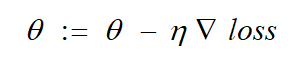

对应到每个权重公式为：

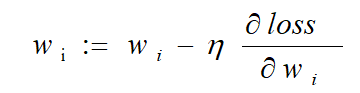

其中$\eta$为**学习率**，是0到1之间的值，是个超参数，需要我们自己来确定大小。

##### 算法原理：

在传统机器学习中，损失函数通常为凸函数，假设此时只有一个参数，则损失函数对参数的梯度即损失函数对参数的导数。如果刚开始参数初始在最优解的左边：

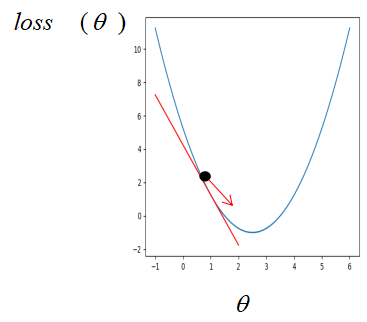

很明显，这个时候**损失函数对参数的导数**是小于0的，而**学习率**是一个0到1之间的数，此时按照公式更新参数，初始的参数减去一个小于0的数是变大，也就是在坐标轴上**向右**走，即朝着**最优解的方向**走。同样的，如果参数初始在最优解的右边：

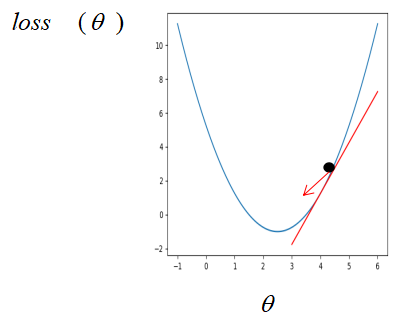

此时按照公式更新，参数将会**向左**走，即**最优解的方向**。所以，不管刚开始参数初始在何位置，按着梯度下降公式不断更新，参数都会朝着最优解的方向走。

##### 梯度下降算法流程

1. 随机初始参数
2. 确定学习率
3. 求出损失函数对参数梯度
4. 按照公式更新参数
5. 重复3、4直到满足终止条件（如：损失函数或参数更新变化值小于某个阈值，或者训练次数达到设定阈值）

### 实操练习

#### 编程要求

根据提示，使用Python实现梯度下降算法，返回损失函数最小值时对应的参数theta。

#### 测试说明

- 损失函数为：$loss=2 \times (\theta − 3)$
- 最优参数为：$3.0$

要求：最优参数的误差低于0.0001。

In [4]:
import numpy as np
import warnings
warnings.filterwarnings("ignore")

def gradient_descent(initial_theta, eta=0.05, n_iters=1000, epslion=1e-8):
    '''
    梯度下降
    :param initial_theta: 参数初始值，类型为float
    :param eta: 学习率，类型为float
    :param n_iters: 训练轮数，类型为int
    :param epslion: 容忍误差范围，类型为float
    :return: 训练后得到的参数
    '''
    #   请在此添加实现代码   #
    #********** Begin *********#
    theta = initial_theta
    i_iter = 0
    while i_iter < n_iters:
        gradient = 2 * (theta - 3)
        last_theta = theta
        theta = theta - eta * gradient
        if(abs(theta - last_theta) < epslion):
            break
        i_iter += 1
    return theta
    #********** End **********#

In [10]:
if gradient_descent(1) - 3.0 < 0.0001:
    print('PASS')

PASS


## 4. 动手实现逻辑回归-癌细胞精准识别

### 任务描述

使用**逻辑回归算法**建立一个模型，并通过**梯度下降算法**进行训练，得到一个能够准确对癌细胞进行识别的模型。

### 相关知识

为了完成本任务，需要掌握：

- 逻辑回归算法流程
- 逻辑回归中的梯度下降

#### 数据集介绍

乳腺癌数据集的样本数量是569，样本中包括**诊断类别**和**属性**，用来预测的属性一共30个，如：

- radius：半径（从中心到边缘上点的距离的平均值）
- texture：纹理（灰度值的标准偏差）等等

诊断类别有： 

- WDBC-Malignant：恶性
- WDBC-Benign：良性

数据集的80%作为训练集，数据集的20%作为测试集，训练集和测试集中都包括特征和类别。其中特征和类别均为数值类型，类别中0代表良性， 1代表恶性。

sklearn中已经提供了乳腺癌数据集的相关接口，可通过sklearn.datasets的load_breast_cancer()函数加载。

#### 构建逻辑回归模型

由数据集可以知道，每一个样本有30个特征和1个标签，而我们要做的事就是通过这30个特征来训练并预测细胞是良性还是恶性(其中标签y=0表示是良性， y=1表示是恶性)。**逻辑回归**算法正好是一个**二分类**模型，我们可以构建一个逻辑回归模型，来对癌细胞进行识别。模型如下：

$$
z = b + w_1x_1 + w_2x_2 + ... + w_nx_n
$$

$$
y = \frac{1}{1 + e^{-z}}
$$

其中，$x_i$表示第$i$个特征，$w_i$表示第$i$个特征对应的权重，$b$表示偏置。

为了方便，稍微将模型进行变换：

$$
z = w_0x_0 + w_1x_1 + w_2x_2 + ... + w_nx_n
$$

其中$x_0=1$

将上述公式向量化：

$$
Z = \theta X
$$

$$
\theta = (w_0, w_1, ..., w_n)
$$

$$
X = (1, x_1, ..., x_n)
$$

$$
y= \frac{1}{1 + e^{-\theta X}}
$$

我们将一个样本输入模型，如果预测值大于等于0.5则判定为1类别，如果小于0.5则判定为0类别。

#### 训练逻辑回归模型

已经知道如何构建一个逻辑回归模型，但是如何得到一个能正确对癌细胞进行识别的模型呢？通常，我们先将数据输入到模型，从而得到一个预测值，再将预测值与真实值结合，得到一个损失函数，最后用梯度下降的方法来优化损失函数，从而不断的更新模型的参数θ，最后得到一个能够正确对良性细胞和癌细胞进行分类的模型。

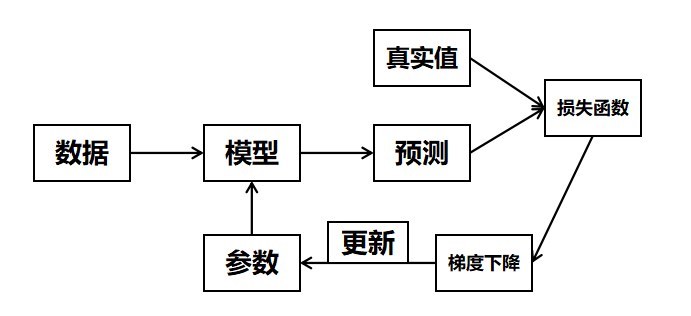

在上一节中，我们知道要使用梯度下降算法首先要知道**损失函数对参数的梯度**，即**损失函数对每个参数的偏导**，求解步骤如下：

$$
loss = -ylna - (1 - y)ln(1 - a)
$$

$$
\frac{\partial{loss}}{\partial w} = 
\frac{\partial{loss}}{\partial a}\cdot\frac{\partial a}{\partial z}\cdot\frac{\partial z}{\partial w}
$$

$$
\frac{\partial{loss}}{\partial a} = 
- \frac{y}{a} - \frac{1 - y}{1 - a}(-1) = \frac{a - y}{a(1 - a)}
$$

$$
\frac{\partial a}{\partial z} = \frac{e^{-z}}{(1 + e^{-z})^2} = a \cdot (1 - a)
$$

$$
\frac{\partial z}{\partial w} = x
$$

$$
\frac{\partial{loss}}{\partial w} = (a - y)x
$$

其中，$a$为预测值，$y$为真实值。

于是，逻辑回归中的梯度下降公式如下：

$$
w_i = w_i - \eta(a - y)x_i
$$



### 实操练习

#### 编程要求

根据提示，补充Begin-End处Python代码，构建一个**逻辑回归模型**，并对其进行**训练**，最后将得到的逻辑回归模型对癌细胞进行识别。

#### 测试说明

只需返回预测结果即可，要求预测正确率高于90%。

【提示】构建模型时$x_0$是添加在数据的左边，请根据提示构建模型,且返回theta形状为(n,)，n为特征个数。

In [67]:
import numpy as np

class MyLogisticRegression:
    '''
    自定义逻辑回归模型
    '''
    
    def __init__(self):
        '''初始化逻辑回归模型'''
        self.theta = None
        
    def fit(self, X_train, y_train, eta=1e-3, n_iters=10000):
        '''
        训练逻辑回归模型
        :param X_train: 训练集特征数据，类型为ndarray
        :param y_train: 训练集标签，类型为ndarray
        :param eta: 学习率，类型为float
        :param n_iters: 训练轮数，类型为int
        :return: 模型参数，类型为ndarray
        '''
        ones = np.ones((len(X_train), 1))
        X = np.hstack([ones, X_train])
        #请在此添加实现代码#
        #********* Begin *********#
        self.theta = np.zeros(X.shape[1])
        i_iter = 0
        while i_iter < n_iters:
            gradient = (sigmoid(X.dot(self.theta)) - y_train).dot(X)
            self.theta = self.theta - eta * gradient
            i_iter += 1
        #********* End *********#
        return self.theta
    
    def predict(self, X_test):
        '''
        输入: X_test(ndarray):测试样本
        输出: 预测结果
        '''
        X = np.hstack([np.ones((len(X_test), 1)), X_test])
        Z = X.dot(self.theta)
        y = sigmoid(Z)

        return y >= 0.5
        #********* End ***********#

In [68]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# 加载乳腺癌数据集
cancer=load_breast_cancer()
X = cancer.data
y = cancer.target

# 拆分数据集，训练集占比80%,测试集占比20%
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, random_state=12
)

# 创建模型
my_lr = MyLogisticRegression()
# 训练模型
my_lr.fit(X_train, y_train)
# 预测
y_pred = my_lr.predict(X_test)

# 评估模型
print('正确率:{:.2f}%'.format(accuracy_score(y_test, y_pred) * 100))

正确率:92.11%


和sklearn的LogisticRegression对比一下：

In [69]:
from sklearn.linear_model import LogisticRegression as SKLR

sk_lr =  SKLR()
sk_lr.fit(X_train, y_train)
y_pred = sk_lr.predict(X_test)

# 评估模型
print('正确率:{:.2f}%'.format(accuracy_score(y_test, y_pred) * 100))

正确率:93.86%


可见，sklearn的LogisticRegression的正确率要高一些。

## 5. 手写数字识别

### 任务描述

使用sklearn中的LogisticRegression类完成手写数字识别任务。

### 相关知识

为了完成本任务，需要掌握如何使用sklearn提供的LogisticRegression类。

#### 数据集介绍

本关使用的是手写数字数据集，该数据集有1797个样本，每个样本包括`8*8`像素（实际上是每个样本有64个特征，每个像素看成是一个特征，每个特征都是float类型的数值）的图像和一个`[0, 9]`整数的标签。比如下图的标签是2：

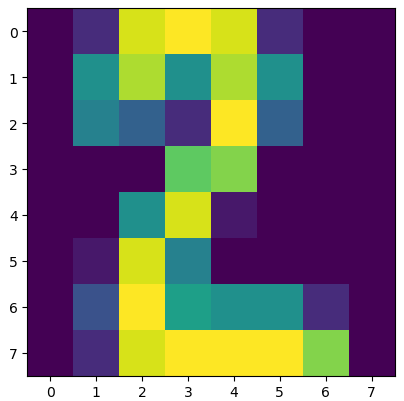

sklearn为该数据集提供了接口，若想使用该数据集，代码如下：

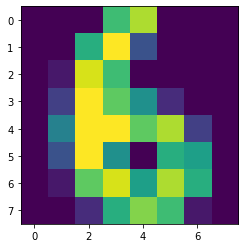

In [71]:
from sklearn import datasets
import matplotlib.pyplot as plt
#加载数据集
digits = datasets.load_digits()
#X表示图像数据，y表示标签
X = digits.data
y = digits.target
#将第233张手写数字可视化
plt.imshow(digits.images[232])
plt.show()

#### LogisticRegression

LogisticRegression中默认实现了OVR，因此LogisticRegression可以实现多分类。LogisticRegression的构造函数中有三个常用的参数可以设置：

- **`solver`**：{'newton-cg' ,  'lbfgs',  'liblinear',  'sag',  'saga'}， 分别为几种优化算法。默认为liblinear
- **`C`**：正则化系数的倒数，默认为1.0，越小代表正则化越强
- **`max_iter`**：最大训练轮数，默认为100

和sklearn中其他分类器一样，LogisticRegression类中的`fit`函数用于训练模型，`fit`函数有两个向量输入：

- **`X`**：大小为`(样本数量,特征数量)` 的ndarray，存放**训练样本**；

- **`Y`**：值为整型，大小为`(样本数量,)`的ndarray，存放训练样本的**分类标签**。

LogisticRegression类中的`predict`函数用于预测，返回**预测标签**，`predict`函数有一个向量输入：

- **`X`**：大小为`(样本数量,特征数量)`的ndarray，存放**测试样本**。

### 实操练习

#### 编程要求

填写下列`digit_predict(train_sample, train_label, test_sample)`函数完成手写数字识别任务，其中：

- `train_image`：训练集图像，类型为`ndarray`，`shape`=`[-1, 8, 8]`
- `train_label`：训练集标签，类型为`ndarray`
- `test_image`：测试集图像，类型为`ndarray`

#### 测试说明

只需返回预测结果即可，要求预测正确率高于0.95。

In [76]:
from sklearn.linear_model import LogisticRegression

def digit_predict(train_image, train_label, test_image):
    '''
    实现功能：训练模型并输出预测结果
    :param train_sample: 包含多条训练样本的样本集，类型为ndarray,shape为[-1, 8, 8]
    :param train_label: 包含多条训练样本标签的标签集，类型为ndarray
    :param test_sample: 包含多条测试样本的测试集，类型为ndarry
    :return: test_sample对应的预测标签
    '''

    #************* Begin ************#
    # 训练集变形
    flat_train_image = train_image.reshape((-1, 64))
    # 训练集标准化
    train_min = flat_train_image.min()
    train_max = flat_train_image.max()
    flat_train_image = (flat_train_image-train_min)/(train_max-train_min)
    # 测试集变形
    flat_test_image = test_image.reshape((-1, 64))
    # 测试集标准化
    test_min = flat_test_image.min()
    test_max = flat_test_image.max()
    flat_test_image = (flat_test_image - test_min) / (test_max - test_min)
    # 训练--预测
    rf = LogisticRegression(C=4.0)
    rf.fit(flat_train_image, train_label)
    return rf.predict(flat_test_image)
    #************* End **************#

In [77]:
from sklearn import datasets

digits = datasets.load_digits()
# 拆分数据集，训练集占比80%,测试集占比20%
X_train, X_test, y_train, y_test = train_test_split(
    digits.data, digits.target, 
    test_size=0.2, random_state=12
)
# 训练并预测
y_pred = digit_predict(X_train, y_train, X_test)
# 评估模型
print('正确率:{:.2f}%'.format(accuracy_score(y_test, y_pred) * 100))

正确率:96.11%
